In [48]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
from pathlib import Path
from cellpose import models, utils, plot
import pandas as pd

from inference import Inference

In [15]:
import IPython

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# Open the HDF5 file
DATA_FOLDER = Path("/home/rai/Documents/MSCE/Sem2/ami/project_datashare")
filepath = DATA_FOLDER / "sample01.pre"
file = h5py.File(filepath, 'r')

# Access the dataset
amplitude = file['amplitude/images']
phase = file['phase/images']

img_idx = 25

phase_img = phase[img_idx]
amplitude_img = amplitude[img_idx]

In [39]:
segmentation_method = "threshold"
classification_method = "SVC"

In [40]:
inf = Inference(segmentation_method, classification_method)

In [41]:
masks = inf._segment(phase_img, amplitude_img)

In [42]:
extracted_features = inf._extract_features(phase_img, amplitude_img, masks)

extracted_features.head()

,Volume,Roundness,Opacity,AmplitudeVariance,AmplitudeSkewness,MaxAmplitude,MinAmplitude,DryMassDensity,MaxPhase,MinPhase,...,PhaseSTDLocalKurtosis,PhaseSTDLocalMin,PhaseSTDLocalMax,AmplitudeSTDLocalMean,AmplitudeSTDLocalVariance,AmplitudeSTDLocalSkewness,AmplitudeSTDLocalKurtosis,AmplitudeSTDLocalMin,AmplitudeSTDLocalMax,MaskID
0,232.214682,0.946721,12.160326,0.001374,0.053002,0.129395,-0.039215,0.073231,3.031250,-0.134766,...,2.885590,0.009757,0.714625,0.020550,0.000127,0.711290,2.552181,0.003099,0.048107,0
1,325.100554,0.895827,12.019846,0.001575,-0.385194,0.145142,-0.066650,0.111155,3.650391,-0.168213,...,2.299774,0.026288,0.713614,0.020356,0.000164,1.172794,3.953994,0.003324,0.063943,1
2,18.766738,1.043674,12.522321,0.000460,-0.860759,0.035309,-0.062744,0.045959,0.758789,0.026550,...,1.643658,0.018450,0.260449,0.013551,0.000046,0.929593,3.139688,0.003780,0.033244,2
3,266.572976,0.920815,12.154696,0.000977,-0.050369,0.105896,-0.039215,0.085943,4.031250,-0.204102,...,1.872171,0.008198,0.763574,0.018256,0.000082,0.889100,3.453275,0.002927,0.049440,3
4,259.061542,0.940958,12.202381,0.001243,0.374753,0.121582,-0.039215,0.084267,3.396484,-0.205566,...,1.982319,0.019370,0.687775,0.020773,0.000110,0.710216,2.832177,0.003978,0.052526,4


In [43]:
predictions, probabilities = inf._classify(extracted_features)

print(predictions)
print(probabilities)

[b'rbc' b'rbc' b'agg' b'rbc' b'rbc' b'rbc']
[[0.04963165 0.03202905 0.00547635 0.90495561 0.00790734]
 [0.08296839 0.04583781 0.00725564 0.83875707 0.02518109]
 [0.43891734 0.31670615 0.12592593 0.0511148  0.06733578]
 [0.14369367 0.02814796 0.01020094 0.68447335 0.13348408]
 [0.04412712 0.01246072 0.00459046 0.92187579 0.01694591]
 [0.15757473 0.03373634 0.00764804 0.71211921 0.08892169]]


In [44]:
segmentation_method = "threshold"
classification_method = "TSC"

In [45]:
inf2 = Inference(segmentation_method, classification_method)
masks2 = inf._segment(phase_img, amplitude_img)
extracted_features2 = inf._extract_features(phase_img, amplitude_img, masks)

extracted_features2.head()

,Volume,Roundness,Opacity,AmplitudeVariance,AmplitudeSkewness,MaxAmplitude,MinAmplitude,DryMassDensity,MaxPhase,MinPhase,...,PhaseSTDLocalKurtosis,PhaseSTDLocalMin,PhaseSTDLocalMax,AmplitudeSTDLocalMean,AmplitudeSTDLocalVariance,AmplitudeSTDLocalSkewness,AmplitudeSTDLocalKurtosis,AmplitudeSTDLocalMin,AmplitudeSTDLocalMax,MaskID
0,232.214682,0.946721,12.160326,0.001374,0.053002,0.129395,-0.039215,0.073231,3.031250,-0.134766,...,2.885590,0.009757,0.714625,0.020550,0.000127,0.711290,2.552181,0.003099,0.048107,0
1,325.100554,0.895827,12.019846,0.001575,-0.385194,0.145142,-0.066650,0.111155,3.650391,-0.168213,...,2.299774,0.026288,0.713614,0.020356,0.000164,1.172794,3.953994,0.003324,0.063943,1
2,18.766738,1.043674,12.522321,0.000460,-0.860759,0.035309,-0.062744,0.045959,0.758789,0.026550,...,1.643658,0.018450,0.260449,0.013551,0.000046,0.929593,3.139688,0.003780,0.033244,2
3,266.572976,0.920815,12.154696,0.000977,-0.050369,0.105896,-0.039215,0.085943,4.031250,-0.204102,...,1.872171,0.008198,0.763574,0.018256,0.000082,0.889100,3.453275,0.002927,0.049440,3
4,259.061542,0.940958,12.202381,0.001243,0.374753,0.121582,-0.039215,0.084267,3.396484,-0.205566,...,1.982319,0.019370,0.687775,0.020773,0.000110,0.710216,2.832177,0.003978,0.052526,4


In [46]:
predictions, probabilities = inf2._classify(extracted_features2)
print(predictions)
print(probabilities)

['rbc', 'agg', 'plt', 'rbc', 'rbc', 'rbc']
{'oof_proba': array([[0.9947676 , 0.00523239],
       [0.92990535, 0.07009464],
       [0.9854943 , 0.01450571],
       [0.994794  , 0.005206  ],
       [0.994889  , 0.00511099],
       [0.9948232 , 0.00517677]], dtype=float32), 'agg_proba': array([[0.984173  , 0.015827  ],
       [0.4307537 , 0.5692463 ],
       [0.9937074 , 0.00629256],
       [0.9854815 , 0.01451847],
       [0.9809353 , 0.01906473],
       [0.9718227 , 0.02817732]], dtype=float32), 'cell_proba': array([[0.08209503, 0.68101129, 0.23689368],
       [0.05957478, 0.7586346 , 0.18179062],
       [0.45740684, 0.27185794, 0.27073522],
       [0.09862417, 0.53902935, 0.36234648],
       [0.09833969, 0.62211688, 0.27954343],
       [0.17548836, 0.49560136, 0.32891028]])}


In [56]:
df_labeled = pd.read_csv("/home/rai/Documents/MSCE/Sem2/ami/Group06/notebooks/labeled_examples.csv")
# we remove the centroid displacement features as they're bugged (for now)
del df_labeled['PhaseSTDLocalCentroidDisplacement']
del df_labeled['AmplitudeSTDLocalCentroidDisplacement']

df_labeled['Labels'] = df_labeled['Labels'].str.strip("b'")

X = df_labeled.drop("Labels", axis=1)
y = df_labeled['Labels']

In [57]:
predictions1, probabilities1 = inf._classify(X)
predictions2, probabilities2 = inf2._classify(X)

In [67]:
string_list = [item.decode() for item in predictions1]
predictions1 = pd.Series(string_list).str.strip("b'")


Classification Report One Step:
              precision    recall  f1-score   support

         agg       0.89      0.85      0.87        20
         oof       1.00      0.91      0.95        11
         plt       0.92      1.00      0.96        23
         rbc       0.94      1.00      0.97        31
         wbc       1.00      0.92      0.96        26

    accuracy                           0.95       111
   macro avg       0.95      0.94      0.94       111
weighted avg       0.95      0.95      0.95       111


Classification Report Three Step:
              precision    recall  f1-score   support

         agg       1.00      0.90      0.95        20
         oof       1.00      0.73      0.84        11
         plt       0.88      1.00      0.94        23
         rbc       0.94      1.00      0.97        31
         wbc       0.96      0.96      0.96        26

    accuracy                           0.95       111
   macro avg       0.96      0.92      0.93       111
weighted 

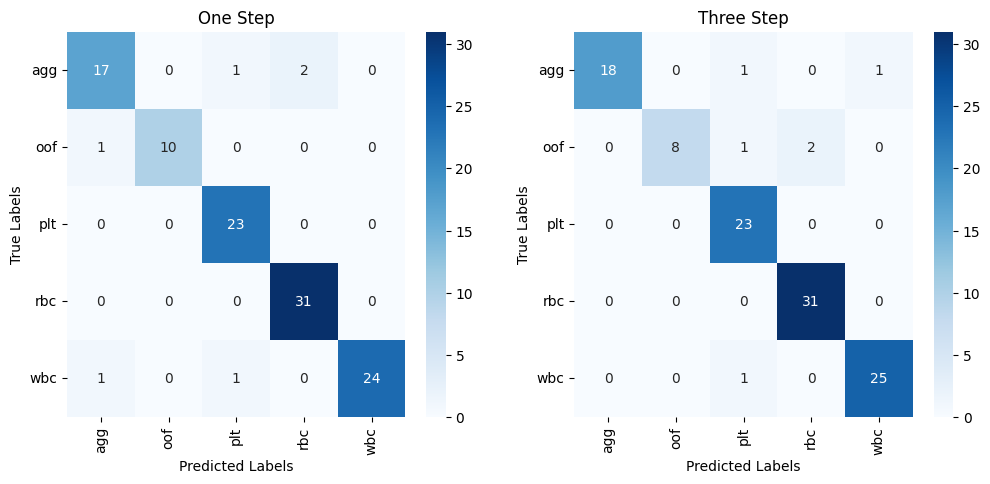

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

confusion_mtx_train = confusion_matrix(y, predictions1)
classification_rep_train = classification_report(y, predictions1)

# Calculate confusion matrix and classification report
confusion_mtx = confusion_matrix(y, predictions2)
classification_rep = classification_report(y, predictions2)

# Print confusion matrix and classification report
print("\nClassification Report One Step:")
print(classification_rep_train)
print("\nClassification Report Three Step:")
print(classification_rep)


# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Plot the confusion matrix heatmap
sns.heatmap(confusion_mtx_train, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title('One Step')
# Plot the confusion matrix heatmap
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title('Three Step')

for i in range(2):
# Set labels, title, and ticks
    axs[i].set_xlabel('Predicted Labels')
    axs[i].set_ylabel('True Labels')
    axs[i].xaxis.set_ticklabels(np.unique(y), rotation=90)
    axs[i].yaxis.set_ticklabels(np.unique(y), rotation=0)

# Show the plot
plt.show()